# SD212: Graph mining
## Lab 1: Graph structure

In this lab, you will check three structural properties of real graphs:
* the [power-law](https://en.wikipedia.org/wiki/Power_law#Power-law_probability_distributions) of degrees,
* the [small-world](https://en.wikipedia.org/wiki/Small-world_network) property,
* the tendency to [cluster](https://en.wikipedia.org/wiki/Clustering_coefficient).

## Import

In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [2]:
from sknetwork.data import load_netset, erdos_renyi
from sknetwork.path import get_distances, get_diameter, get_shortest_path
from sknetwork.utils import bipartite2undirected, get_degrees
from sknetwork.topology import Triangles

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [3]:
openflights = load_netset('openflights')

Parsing files...
Done.


In [4]:
type(openflights)

sknetwork.utils.Bunch

In [5]:
# weighted adjacency matrix
adjacency = openflights.adjacency

In [6]:
# binary adjacency matrix
adjacency = adjacency > 0

In [7]:
adjacency

<3097x3097 sparse matrix of type '<class 'numpy.bool_'>'
	with 36386 stored elements in Compressed Sparse Row format>

In [8]:
wikivitals = load_netset('wikivitals')

Parsing files...
Done.


In [9]:
cinema = load_netset('cinema')

Parsing files...
Done.


## 1. Power law

We first focus on the power law degree distribution.

We consider the empirical distributions of:
* degrees in the Openflights graph,
* in-degrees and out-degrees in the WikiVitals graph.

## To do

For each of these distributions:
* Plot the [tail distribution](https://en.wikipedia.org/wiki/Cumulative_distribution_function#Complementary_cumulative_distribution_function_(tail_distribution)) in log-log scale.
* Conclude: do you consider that these are power-law graphs?

In [10]:
def plot_loglog(degrees):
    """Plot the degree distribution in log-log scale and compare with that of a random graph.
    
    Parameters
    ----------
    degrees : array
        vector of degrees of the graph.
    """
    n = len(degrees)
    # comparison with a random graph
    adjacency_random = erdos_renyi(n, np.sum(degrees) / n / (n-1))
    degrees_random = adjacency_random.dot(np.ones(n))
    plt.loglog(np.sort(degrees), 1 - np.arange(n) / n, lw = 3, label='Real graph')
    plt.loglog(np.sort(degrees_random), 1 - np.arange(n) / n, lw = 3, label = 'Random graph')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

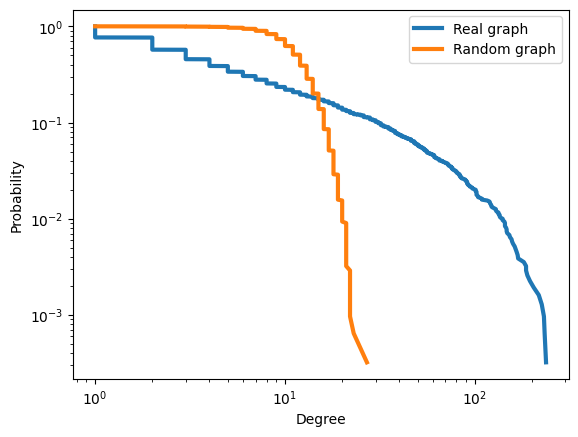

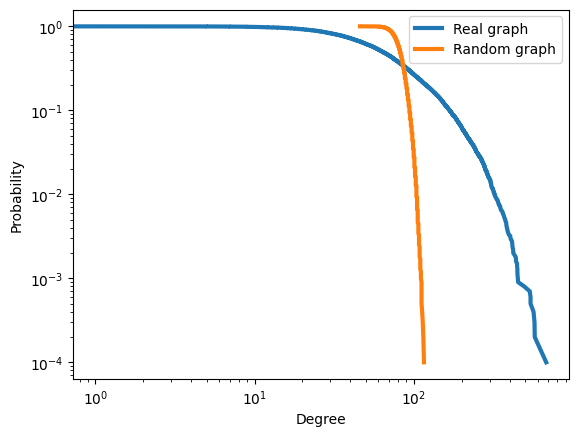

In [11]:
degrees=adjacency.dot(np.ones(adjacency.shape[0]))
plot_loglog(degrees)

degrees=get_degrees(wikivitals.adjacency)
plot_loglog(degrees)

## 2. Small-world

You will now make a few experiments highlighting the small-world property.

## To do

* Give a shortest path of maximum length starting from **Paris Charles de Gaulle** airport in Openflights.<br> 
List the corresponding airports.
* Give a shortest path from [Plato](https://en.wikipedia.org/wiki/Plato) to [Platini](https://en.wikipedia.org/wiki/Michel_Platini) in WikiVitals.<br>
List the corresponding articles.

In [12]:
cdg = np.where(openflights.names=="Charles de Gaulle International Airport")[0][0]
distance = get_distances(adjacency, sources=cdg)
farthest = np.where(distance==np.max(distance))[0][0]
print(openflights.names[farthest])
print(distance[farthest])
path = get_shortest_path(adjacency, cdg, farthest)
print(path)
for i in path:
    print(openflights.names[i])

Peawanuck Airport
7.0
[622, 124, 85, 56, 2253, 2290, 2248, 2277]
Charles de Gaulle International Airport
Lester B. Pearson International Airport
Timmins/Victor M. Power
Moosonee Airport
Fort Albany Airport
Kashechewan Airport
Attawapiskat Airport
Peawanuck Airport


In [13]:
plato = np.where(wikivitals.names=="Plato")[0][0]
platini = np.where(wikivitals.names=="Michel Platini")[0][0]

path = get_shortest_path(wikivitals.adjacency, plato, platini)
print(len(path), path)
for i in path:
    print(wikivitals.names[i])

4 [7108, 10001, 3233, 5893]
Plato
Émile Durkheim
France
Michel Platini


## To do

* Which fraction of the airports can be reached from **Paris Charles de Gaulle** in 1, 2, 3 flights?
* Which fraction of the articles can be reached from **Paris** in 1, 2, 3 clicks on Wikipedia Vitals?

In [46]:
n = len(openflights.names)
cdg = np.where(openflights.names=="Charles de Gaulle International Airport")[0][0]
distance = get_distances(adjacency, sources=cdg)
print(len(np.where(distance==1)[0])/n)
print(len(np.where(distance==2)[0])/n)
print(len(np.where(distance==3)[0])/n)

0.07523409751372295
0.5434291249596384
0.28995802389409103


In [19]:
distance = get_distances(wikivitals.adjacency, sources=np.where(wikivitals.names=="Paris")[0][0])
n = len(wikivitals.names)
print(len(np.where(distance==1)[0])/n)
print(len(np.where(distance==2)[0])/n)
print(len(np.where(distance==3)[0])/n)

0.039456597742483265
0.6346019378683448
0.3191489361702128


## To do

* Compute the [Bacon number](https://fr.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon) of all actors (**without** building the co-starring actor graph).
* Plot the corresponding histogram.

3465
44586


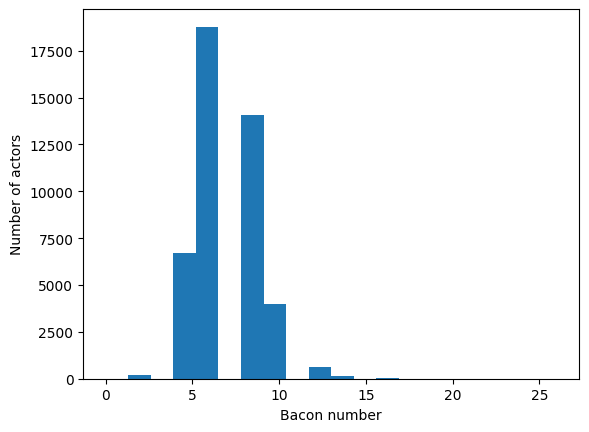

In [74]:
adjacencyCinema = bipartite2undirected(cinema.biadjacency)
namesCinema = cinema.names_col
n_row, n_col = cinema.biadjacency.shape
bacon = np.where(namesCinema=="Kevin Bacon")[0][0]
print(bacon)
baconNumber = get_distances(adjacencyCinema, sources=bacon+n_row)[-n_col:]
print(len(baconNumber))
plt.hist(baconNumber, bins=20)
plt.xlabel("Bacon number")
plt.ylabel("Number of actors")
plt.show()

## 3. Clustering coefficient

Finally, we check the clustering property of real graph (my friends tend to be friends).

## To do


* Compute the clustering coefficient of Openflights and WikiVitals (seen as an undirected graph).
* Compare with that of a random graph of same size.

In [79]:
triangles = Triangles()
triangles.fit(openflights.adjacency)
print("Openflight : ",triangles.clustering_coef_)

degrees = get_degrees(openflights.adjacency)
n = len(degrees)
adjacency_random = erdos_renyi(n, np.sum(degrees) / n / (n-1))
triangles_random = Triangles()
triangles_random.fit(adjacency_random)
print("Random : ", triangles_random.clustering_coef_)

triangles = Triangles()
triangles.fit(wikivitals.adjacency)
print("Wikivital", triangles.clustering_coef_)

Openflight :  0.25107219520077
Random :  0.0037785861320249275
Wikivital 0.21128544972101573
